<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#参考情報" data-toc-modified-id="参考情報-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>参考情報</a></span></li><li><span><a href="#迷路" data-toc-modified-id="迷路-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>迷路</a></span></li><li><span><a href="#Q学習" data-toc-modified-id="Q学習-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Q学習</a></span></li><li><span><a href="#インポート" data-toc-modified-id="インポート-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>インポート</a></span></li><li><span><a href="#クラス定義" data-toc-modified-id="クラス定義-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>クラス定義</a></span><ul class="toc-item"><li><span><a href="#環境" data-toc-modified-id="環境-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>環境</a></span></li><li><span><a href="#エージェント" data-toc-modified-id="エージェント-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>エージェント</a></span><ul class="toc-item"><li><span><a href="#標準" data-toc-modified-id="標準-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>標準</a></span></li><li><span><a href="#UCB1-(Upper-Confidence-Bound-(信頼上限)-のバージョン-1)" data-toc-modified-id="UCB1-(Upper-Confidence-Bound-(信頼上限)-のバージョン-1)-5.2.2"><span class="toc-item-num">5.2.2&nbsp;&nbsp;</span>UCB1 (Upper Confidence Bound (信頼上限) のバージョン 1)</a></span></li><li><span><a href="#DQN" data-toc-modified-id="DQN-5.2.3"><span class="toc-item-num">5.2.3&nbsp;&nbsp;</span>DQN</a></span></li></ul></li><li><span><a href="#サブ関数" data-toc-modified-id="サブ関数-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>サブ関数</a></span><ul class="toc-item"><li><span><a href="#経験の蓄積用クラス" data-toc-modified-id="経験の蓄積用クラス-5.3.1"><span class="toc-item-num">5.3.1&nbsp;&nbsp;</span>経験の蓄積用クラス</a></span></li></ul></li></ul></li><li><span><a href="#プロット" data-toc-modified-id="プロット-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>プロット</a></span></li><li><span><a href="#シミュレーション" data-toc-modified-id="シミュレーション-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>シミュレーション</a></span><ul class="toc-item"><li><span><a href="#Q学習" data-toc-modified-id="Q学習-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Q学習</a></span></li><li><span><a href="#DQN" data-toc-modified-id="DQN-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>DQN</a></span></li></ul></li></ul></div>

# 参考情報


# 迷路
<img src="meiro2.png" width="500">

# Q学習
<img src="Q_Learning.png" width="500">

オレンジのパスがQ値を最大にするパスである場合、$Q(s_0,b)$の割引現在価値は、
$$\begin{eqnarray}
Q(s_0,b) &=& r_2 + \gamma Q(s_2,a)  \\
         &=& r_2 + \gamma r_5 + \gamma^2 Q(s_5,a) \\
         &=& r_2 + \gamma r_5 + \gamma^2 r_9
\end{eqnarray}$$

アルファ碁解体新書(p.140)によれば
<img src="QLearning_Fig.png" width=500>

# インポート

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pickle
from IPython import display
#from collections import namedtuple

# クラス定義

## 環境

In [102]:
class Enviro:
    def __init__(self):
        self.state = {}
        # Meiro1
        """
        self.state[0] = [ 0, 1, 4, 0]
        self.state[1] = [ 1, 2, 1, 0]
        self.state[2] = [ 2, 3, 2, 1]
        self.state[3] = [ 3, 3, 7, 2]
        self.state[4] = [ 0, 5, 8, 4]
        self.state[5] = [ 5, 6, 9, 4]
        self.state[6] = [ 6, 6, 10, 5]
        self.state[7] = [ 3, 7, 11, 7]
        self.state[8] = [ 4, 8, 8, 8]
        self.state[9] = [ 5, 9, 13, 9]
        self.state[10] = [ 6, 10, 14, 10]
        self.state[11] = [ 7, 11, 11, 11]
        self.state[12] = [ 12, 13, 12, 12]
        self.state[13] = [ 9, 13, 13, 12]
        self.state[14] = [ 10, 15, 14, 14]
        self.state[15] = [ 15, 16, 15, 14]
        self.goal = 16
        """
        # Meiro2
        self.state[0] = [ 0, 1, 4, 0]
        self.state[1] = [ 1, 2, 1, 0]
        self.state[2] = [ 2, 3, 2, 1]
        self.state[3] = [ 3, 3, 7, 2]
        self.state[4] = [ 0, 5, 8, 4]
        self.state[5] = [ 5, 6, 5, 4]
        self.state[6] = [ 6, 6, 10, 5]
        self.state[7] = [ 3, 7, 11, 7]
        self.state[8] = [ 4, 8, 12, 8]
        self.state[9] = [ 9, 9, 13, 9]
        self.state[10] = [ 6, 11, 14, 10]
        self.state[11] = [ 7, 11, 11, 10]
        self.state[12] = [ 8, 13, 12, 12]
        self.state[13] = [ 9, 13, 13, 12]
        self.state[14] = [ 10, 15, 14, 14]
        self.state[15] = [ 15, 16, 15, 14]
        self.goal = 16
        
        self.prev_state = -1
        
    def move(self, current_state, action ):
        next_state = self.state[current_state][action]
        if next_state == self.goal:
            reward = 1.0
        elif ( current_state == next_state ):
            reward = -1.0
        elif next_state == 6:
            reward = -1.0
        else:
            reward = 0
        self.prev_state = current_state
        return next_state, reward

    def get_goal(self):
        return self.goal


## エージェント

In [47]:
"""
class Agent:
    def __init__(self):
        self.qt = np.zeros( [17, 4] )
        self.visit = np.ones( [17, 4] )
        self.eps = 0.4
        self.gamma = 0.9
        self.alp = 0.01

    def action(self, state):
        ngame = np.sum( self.visit[15][1] )
        if np.random.rand() < self.eps * 1.386 / np.log(ngame):
            act = int( np.random.rand() * 4 )
        else:
            act = np.argmax( self.qt[state] )
        return act

    def action_ucb1(self, state):
        total_visit = np.sum( self.visit[state] )
        total_rewards = np.sum( self.qt[state] ) + 1e-10
#        ucb1 = self.qt[state] / total_rewards + \
#               np.sqrt( 2.0 * np.log(total_visit / self.visit[state] ) )

        ucb1 = self.qt[state] + \
               np.sqrt( ( 2.0 * np.log(total_visit )  ) / self.visit[state] )

#        print( state, total_visit, total_rewards, ucb1 )
        act = np.argmax( ucb1 )
        return act

    def update( self, src, act, dst, reward ):
        maxq = np.max( self.qt[dst])
        td_diff = reward + self.gamma * maxq - self.qt[src,act]
        self.qt[src,act] += self.alp * td_diff
        self.visit[src,act] += 1

    def batch_update( self, states ):
        pass
    
    def get_qt(self):
        return self.qt

    def get_visit(self):
        return self.visit
"""

'\nclass Agent:\n    def __init__(self):\n        self.qt = np.zeros( [17, 4] )\n        self.visit = np.ones( [17, 4] )\n        self.eps = 0.4\n        self.gamma = 0.9\n        self.alp = 0.01\n\n    def action(self, state):\n        ngame = np.sum( self.visit[15][1] )\n        if np.random.rand() < self.eps * 1.386 / np.log(ngame):\n            act = int( np.random.rand() * 4 )\n        else:\n            act = np.argmax( self.qt[state] )\n        return act\n\n    def action_ucb1(self, state):\n        total_visit = np.sum( self.visit[state] )\n        total_rewards = np.sum( self.qt[state] ) + 1e-10\n#        ucb1 = self.qt[state] / total_rewards + #               np.sqrt( 2.0 * np.log(total_visit / self.visit[state] ) )\n\n        ucb1 = self.qt[state] +                np.sqrt( ( 2.0 * np.log(total_visit )  ) / self.visit[state] )\n\n#        print( state, total_visit, total_rewards, ucb1 )\n        act = np.argmax( ucb1 )\n        return act\n\n    def update( self, src, act, d

### 標準

In [48]:
class Agent:
    def __init__(self, goal ):
        self.qt = np.zeros( [goal+1, 4] )
        self.visit = np.ones( [goal+1, 4] ) # UCB1のゼロ割回避のため
        self.eps = 0.4
        self.gamma = 0.9
        self.alpha = 0.01

    def action(self, state):
        #ngame = np.sum( self.visit[15][1] )
        if np.random.rand() < self.eps: # * 1.386 / np.log(ngame):
            act = int( np.random.rand() * 4 )
        else:
            act = np.argmax( self.qt[state] )
        return act

    def update( self, src, act, dst, reward ):
        maxq = np.max( self.qt[dst])
        td_diff = reward + self.gamma * maxq - self.qt[src,act]
        self.qt[src,act] += self.alpha * td_diff
        self.visit[src,act] += 1

    def batch_update( self, states, goal ): # for DQN
        pass
    
    def get_qt(self):
        return self.qt

    def get_visit(self):
        return self.visit

### UCB1 (Upper Confidence Bound (信頼上限) のバージョン 1)

In [49]:
"""class AgentUcb1(Agent):
    def action(self, state):
        total_visit = np.sum( self.visit[state] )
        total_rewards = np.sum( self.qt[state] ) + 1e-10
#        ucb1 = self.qt[state] / total_rewards + \
#               np.sqrt( 2.0 * np.log(total_visit / self.visit[state] ) )

        ucb1 = self.qt[state] + \
               np.sqrt( ( 2.0 * np.log(total_visit )  ) / self.visit[state] )

#        print( state, total_visit, total_rewards, ucb1 )
        act = np.argmax( ucb1 )
        return act
"""
class AgentUcb1(Agent):
    def action(self, state):
        ucb1 = get_ucb1( self.qt[state], self.visit[state] )
        act = np.argmax( ucb1 )
        return act
    

In [50]:
def get_ucb1( qts, visits ):
    total_visit = np.sum( visits )
    ucb1 = qts + np.sqrt( ( 2.0*np.log(total_visit) ) / visits )
    return ucb1
    

### DQN

In [97]:
from keras.models import Sequential, clone_model
from keras.optimizers import Adam
from keras.layers import Dense
from sklearn.preprocessing import OneHotEncoder

class AgentDQN(Agent):
    def __init__(self, goal, nbatch=32 ):
        super().__init__(goal)
        self.nbatch = nbatch
        self.goal = goal
        self.fixed_cnt = 0
        self.model = Sequential()
        self.model.add(Dense(12, activation='relu', input_shape=(goal+1,)))  
        self.model.add(Dense(12, activation='relu' ) )
        self.model.add(Dense(4) ) 
        #self.model.add(Dense(4, activation='relu') ) # 負の価値を避ける
        self.model.summary()
        opt = Adam(learning_rate=0.0002 ) # 0.0002
        #opt = Adam()
        self.model.compile(optimizer=opt, loss='mean_squared_error' )

        self.fixed_model = clone_model(self.model)
        self.fixed_model.set_weights(self.model.get_weights())

    def action(self, state):
        x_test, y_pred = self._ohe_forward( [state], self.model )
        #print( "#action ", state, x_test, y_pred )
        ucb1 = get_ucb1( y_pred, self.visit[state])
        return np.argmax( ucb1 )
    
    def update( self, state, act, reward, new_state ):
    #def update( self, exp ):
        # 訪問状態の更新。1step ごとに呼ばれる前提なのでtailの情報で更新
        self.visit[state[-1], act[-1]] += 1 

        expidx = np.random.choice( len(state), self.nbatch ) # Experience replay
        #expidx = np.arange( len(exp['state']) ) # Use All

        states = state[expidx]
        acts = act[expidx]
        rewards = reward[expidx]
        new_states = new_state[expidx]
        
        #print( "#states\n", states )
        #print( "#acts\n", acts )
        #print( "#rewards\n", rewards )
        #print( "#new_states\n", new_states )

        x_train, y_train = self._ohe_forward( states, self.model, train=True )
        _, y_pred_new = self._ohe_forward( new_states, self.fixed_model, train=True )
        
        y_pred_new_max = np.max( y_pred_new, axis=1 )
        
        #print( '#state/act/y_pred [last]', states[-1], acts[-1], y_pred[-1][acts[-1]] )
        ##print( '#new_states[last], y_pred_new_max[last]\n', new_states[-1], y_pred_new_max[-1] )    
        #print( '#y_pred Actual\n', y_pred )
        #print( '#y_pred_next Actual(Fixed)\n', y_pred_new )
        for i,yi in enumerate(y_train):
            #print( i, y, acts[i], rewards[i], y_pred_new_max[i] )
            yi[acts[i]] = rewards[i] + self.gamma * y_pred_new_max[i] # 選択した行動の現在価値を見積もりの現在価値で上書き。選択しなかったものはそのまま。
            
        #print( '#x_train\n', x_train)    
        #print( '#y_pred Ideal\n', y_train )

        loss = self.model.train_on_batch(x_train, y_train)
        self.fixed_cnt += 1
        
        # Fixed Target Q-Network の更新
        if self.fixed_cnt > 3:
            self.fixed_cnt = 0
            #print( '*** Update Fixed Target Q-Network ***')
            self.fixed_model.set_weights(self.model.get_weights())
        
        return loss
        
    def _ohe_forward( self, states, mdl, train=False ):
        """ Forward with One Hot Encoding """
        x_test = np.zeros( (len(states), self.goal+1 ) ) # Goalを含む
        for idx,st in enumerate(states):
            x_test[idx][st] = 1
        y_pred = mdl.predict(x_test)
        #学習時はゴールのQ値は0にする。Test時は未使用なので放置
        if train == True: 
            pos = np.array(states) == self.goal
            y_pred[pos] = 0
            #print( "len(states) #pos= ", len(states), np.where(pos) )
        return x_test, y_pred

    def get_qt(self):
        _,y_pred = self._ohe_forward( np.arange(self.goal), self.model)
        self.qt[:-1][:] = y_pred
        return self.qt

## サブ関数

### 経験の蓄積用クラス

In [52]:
from collections import deque
class Experience:
    def __init__(self,maxlen=50):
        self.state = deque(maxlen=maxlen)
        self.act = deque(maxlen=maxlen)
        self.reward = deque(maxlen=maxlen)
        self.new_state = deque(maxlen=maxlen)

    def append( self, state, act, reward, new_state ):
        self.state.append( int(state) )
        self.act.append( int(act) )
        self.reward.append( float(reward) )
        self.new_state.append( int(new_state) )
        
    def get(self):
        state_array = np.array( self.state )
        act_array = np.array( self.act )
        reward_array = np.array( self.reward )
        new_state_array = np.array( self.new_state )
        return state_array, act_array, reward_array, new_state_array
    

# プロット

In [87]:
class ProgressPlot:
    def __init__(self):
        self.fig, self.ax = plt.subplots( 1,4, figsize=[12,5])
        plt.show()
    
    def update( self, qt_tbl, visit_tbl, cnt_list, qt_hist ):
        self.ax[0].clear()
        self.ax[0].imshow( qt_tbl, cmap='copper' )
        #self.ax[0].invert_yaxis()
        self.ax[0].xaxis.set_major_locator(ticker.MultipleLocator(1.0))
        self.ax[0].yaxis.set_major_locator(ticker.MultipleLocator(1.0))
        self.ax[0].set_title( "Q Table" )

        self.ax[1].clear()
        self.ax[1].imshow( visit_tbl, cmap='copper' )
        #self.ax[1].invert_yaxis()
        self.ax[1].xaxis.set_major_locator(ticker.MultipleLocator(1.0))
        self.ax[1].yaxis.set_major_locator(ticker.MultipleLocator(1.0))
        self.ax[1].set_title( "number of visit" )

        self.ax[2].clear()
        self.ax[2].loglog( cnt_list )
        self.ax[2].grid( which='both', axis='both')
        self.ax[2].set_title( "%d episods %d steps" % (len(cnt_list),cnt_list[-1]))

        self.ax[3].clear()
        state = 0
        self.ax[3].plot( qt_hist[state,:,:].T )
        self.ax[3].legend( "0123")        
        self.ax[3].set_title( "qt history %d" % (state) )

        plt.tight_layout()
        display.clear_output(wait=True)
        display.display(self.fig)
        

# シミュレーション

## Q学習

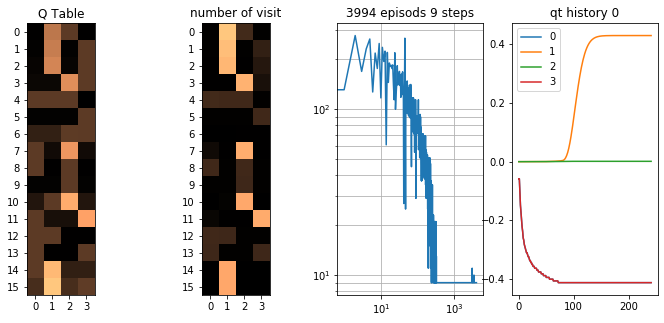

<Figure size 432x288 with 0 Axes>

In [103]:
#Experience = namedtuple( "Experience", "state act reward new_state" )

ev = Enviro()
goal = ev.get_goal()

ag = AgentUcb1( goal=goal )
progress_plot = ProgressPlot()

%matplotlib inline
#fig, ax = plt.subplots( 1,3, figsize=[8,5])
plt.show()

nepi = 4000 # エポック数
max_step = 500  # 1エポックの最大ステップ数
cntplot = 200 #このステップ数を超えたらプロット
cntacc = 0    #前回プロットしてからの累積ステップ数
cnts = []     #エポックごとのステップ数

qt_hist = ag.get_qt().reshape( 17,4,1 )
for epi in range(nepi):
    state = 0
    cnt = 0
    while (state < goal) and ( cnt < max_step ):
        act = ag.action(state)
        new_state, reward = ev.move(state,act)
        ag.update( state, act, new_state, reward )
        # For next Loop
        state = new_state
        cnt += 1
    cnts.append( cnt )
    cntacc += cnt
    if cntacc >= cntplot:
        cntacc = 0
        qt_hist = np.append( qt_hist, ag.get_qt().reshape(17,4,1), axis=2 )
        progress_plot.update( ag.get_qt()[:-1,:], ag.get_visit()[:-1,:], cnts, qt_hist ) # 最終行はガードなので非表示

        

## DQN

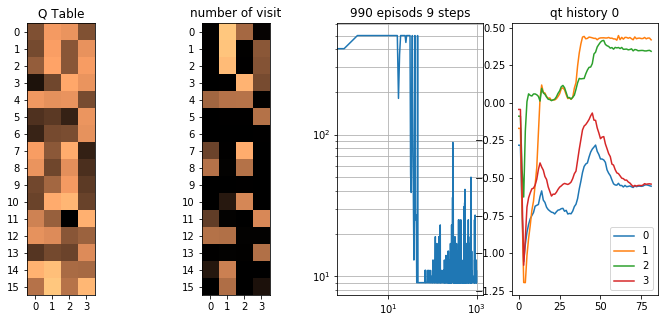

<Figure size 432x288 with 0 Axes>

In [98]:
#Experience = namedtuple( "Experience", "state act reward new_state" )


ev = Enviro()
goal = ev.get_goal()

ag = AgentDQN( goal=goal, nbatch=24 )
progress_plot = ProgressPlot()

%matplotlib inline
#fig, ax = plt.subplots( 1,3, figsize=[8,5])
plt.show()

nepi = 1000 # エポック数
max_step = 500  # 1エポックの最大ステップ数
cntplot = 200 #このステップ数を超えたらプロット
cntacc = 0    #前回プロットしてからの累積ステップ数
cnts = []     #エポックごとのステップ数

buffer_step_size = 5000
#buffer_step_size = 24
exp = Experience( buffer_step_size )

qt_hist = ag.get_qt().reshape( 17,4,1 )
print( qt_hist.shape )

for epi in range(nepi):
    state = 0
    cnt = 0
    while (state < goal) and ( cnt < max_step ):
        act = ag.action(state)
        new_state, reward = ev.move(state,act)
        #ag.update( state, act, new_state, reward )
        # For batch_update
        exp.append( state, act, reward, new_state )
        # Update
        ag.update( *exp.get() )
        #ag.batch_update( exp, goal )
        # For next Loop
        state = new_state
        cnt += 1

    cnts.append( cnt )
    cntacc += cnt
    if cntacc >= cntplot:
        cntacc = 0
        #if( len(exp['state']) > buffer_step_size ):
        #    exp = reset_exp() # 今はリセってできればキュー
        qt_hist = np.append( qt_hist, ag.get_qt().reshape(17,4,1), axis=2 )
        progress_plot.update( ag.get_qt()[:-1,:], ag.get_visit()[:-1,:], cnts, qt_hist ) #最終行はガードなので非表示
        

In [ ]:
ag.get_qt()

In [ ]:

#%qtconsole

In [ ]:
pr_plot = ProgressPlot()
pr_plot.update( ag.get_qt()[:-1,:], ag.get_visit()[:-1,:], cnts) # 最終行はガードなので非表示

In [ ]:
qt_hist[4,:,-1]

In [ ]:
plt.plot( qt_hist[4,:,:].T )

plt.legend( "0123")

In [ ]:
plt.plot( qt_hist_long[4,:,:10].T )
plt.legend( "0123")